In [109]:
from sklearn.feature_selection import mutual_info_regression
from SALib.sample import saltelli
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from tqdm.auto import tqdm
import numpy as np
import pickle
import time
import lzma
import sys
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [2]:
os.chdir("../")
import cpt_optimisation

# Macro

In [8]:
result = {i:[] for i in range(3)}

start_t = time.time()
num_agents = 1225

for seed_folder in os.listdir("DATA/nodebt/"):
    print(f"{time.time()-start_t:.2f} | {seed_folder}")
    if "DS_" in seed_folder:
        continue

    seed = int(seed_folder.split("_")[-1])
    files = os.listdir(f"DATA/nodebt/{seed_folder}")
    
    for f in tqdm(files):
        param_idx = int(f.split("_")[1]) - 1
        data = pickle.load(lzma.open(f"DATA/nodebt/{seed_folder}/{f}"))
        data_W = data["W"]
        
        # determine regime
        prop_richer = sum(data_W[-1] > data_W[0]) / num_agents
        if prop_richer == 0:
            regime = 0
        elif prop_richer < 1:
            regime = 1
        else:
            regime = 2
            
        MI = mutual_info_regression(data["A"].reshape(-1,1), 
                                    data["W"][-1].astype(np.float32))[0]
        result[regime].append((MI, seed, param_idx))

0.00 | new_model_runs_paper_14


  0%|          | 0/7168 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [4]:
with open("attention_results.pickle", "wb") as f:
    pickle.dump(result, f)

# Meso

In [13]:
result = {i:[] for i in range(3)}
start_t = time.time()
num_agents = 1225

for seed_folder in os.listdir("DATA/nodebt/"):
    print(f"{time.time()-start_t:.2f} | {seed_folder}")
    if "DS_" in seed_folder:
        continue

    seed = int(seed_folder.split("_")[-1])
    files = os.listdir(f"DATA/nodebt/{seed_folder}")
    
    for f in tqdm(files):
        param_idx = int(f.split("_")[1]) - 1
        data = pickle.load(lzma.open(f"DATA/nodebt/{seed_folder}/{f}"))
        alpha_val = data["params"][4]
        data_W = data["W"]
        
        # determine regime
        prop_richer = sum(data_W[-1] > data_W[0]) / num_agents
        if prop_richer == 0:
            regime = 0
        elif prop_richer < 1:
            regime = 1
        else:
            regime = 2
        
        # retrieve communities from graph
        with open(f"sda_graphs/{seed}_{alpha_val}.pickle", "rb") as f:
            communities, community_membership, _, _ = pickle.load(f)
            
        for i,c in enumerate(communities):
            idx = np.array(list(c))
            final_comm_w = data_W[-1, idx]
            try:
                MI = mutual_info_regression(data["A"][idx].reshape(-1,1), 
                                            final_comm_w.astype(np.float32))[0]
                result[regime].append((MI, seed, param_idx, i))
            except:
                continue

0.00 | new_model_runs_paper_14


  0%|          | 0/7168 [00:00<?, ?it/s]

1179.65 | new_model_runs_paper_13


  0%|          | 0/7168 [00:00<?, ?it/s]

2307.13 | new_model_runs_paper_12


  0%|          | 0/7168 [00:00<?, ?it/s]

3453.77 | new_model_runs_paper_15


  0%|          | 0/7168 [00:00<?, ?it/s]

4594.06 | .DS_Store
4594.06 | new_model_runs_paper_0


  0%|          | 0/7168 [00:00<?, ?it/s]

5752.17 | new_model_runs_paper_7


  0%|          | 0/7168 [00:00<?, ?it/s]

6924.69 | new_model_runs_paper_9


  0%|          | 0/7168 [00:00<?, ?it/s]

8077.86 | new_model_runs_paper_8


  0%|          | 0/7168 [00:00<?, ?it/s]

9242.26 | new_model_runs_paper_6


  0%|          | 0/7168 [00:00<?, ?it/s]

10390.82 | new_model_runs_paper_1


  0%|          | 0/7168 [00:00<?, ?it/s]

11570.13 | new_model_runs_paper_19


  0%|          | 0/7168 [00:00<?, ?it/s]

12704.49 | new_model_runs_paper_10


  0%|          | 0/7168 [00:00<?, ?it/s]

13858.88 | new_model_runs_paper_17


  0%|          | 0/7168 [00:00<?, ?it/s]

15036.73 | new_model_runs_paper_16


  0%|          | 0/7168 [00:00<?, ?it/s]

16221.17 | new_model_runs_paper_11


  0%|          | 0/7168 [00:00<?, ?it/s]

17371.02 | new_model_runs_paper_18


  0%|          | 0/7168 [00:00<?, ?it/s]

18535.28 | new_model_runs_paper_4


  0%|          | 0/7168 [00:00<?, ?it/s]

19719.07 | new_model_runs_paper_3


  0%|          | 0/7168 [00:00<?, ?it/s]

20895.01 | new_model_runs_paper_2


  0%|          | 0/7168 [00:00<?, ?it/s]

22078.49 | new_model_runs_paper_5


  0%|          | 0/7168 [00:00<?, ?it/s]

In [14]:
with open("attention_results_by_comm.pickle", "wb") as f:
    pickle.dump(result, f)

# Spearman Rank Analysis

In [112]:
reg.feature_importances_

array([0.10763507, 0.02703237, 0.05173556, 0.03503993, 0.77855707])

In [121]:
util_params = np.array(d["U"])
util_params = np.row_stack(
    [(x.delta_pos, x.delta_neg, x.gamma_pos, x.gamma_neg) for x in util_params]
)


In [122]:
X = np.column_stack([util_params, d["A"].reshape(-1,1)])


In [123]:
reg.fit(X, d["W"][-1])

GradientBoostingRegressor(random_state=0)

In [124]:
reg.feature_importances_

array([0.09189345, 0.07092243, 0.38014164, 0.25127718, 0.2057653 ])

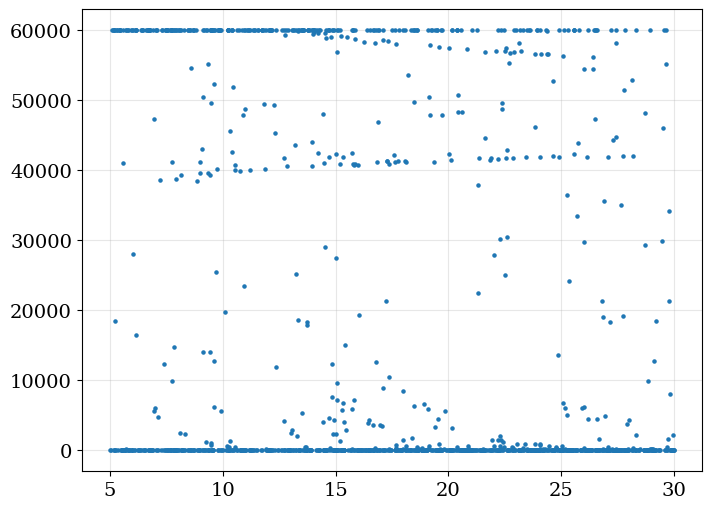

In [146]:
plt.scatter(X[:,2], d["W"][-1], s=5)

In [386]:
safe_investment = np.array([d["P"][x][-1][0] for x in d["P"]])

with open(f"sda_graphs/{s}_{alpha_val}.pickle", "rb") as f:
    _, _, augmented_communities, _ = pickle.load(f)

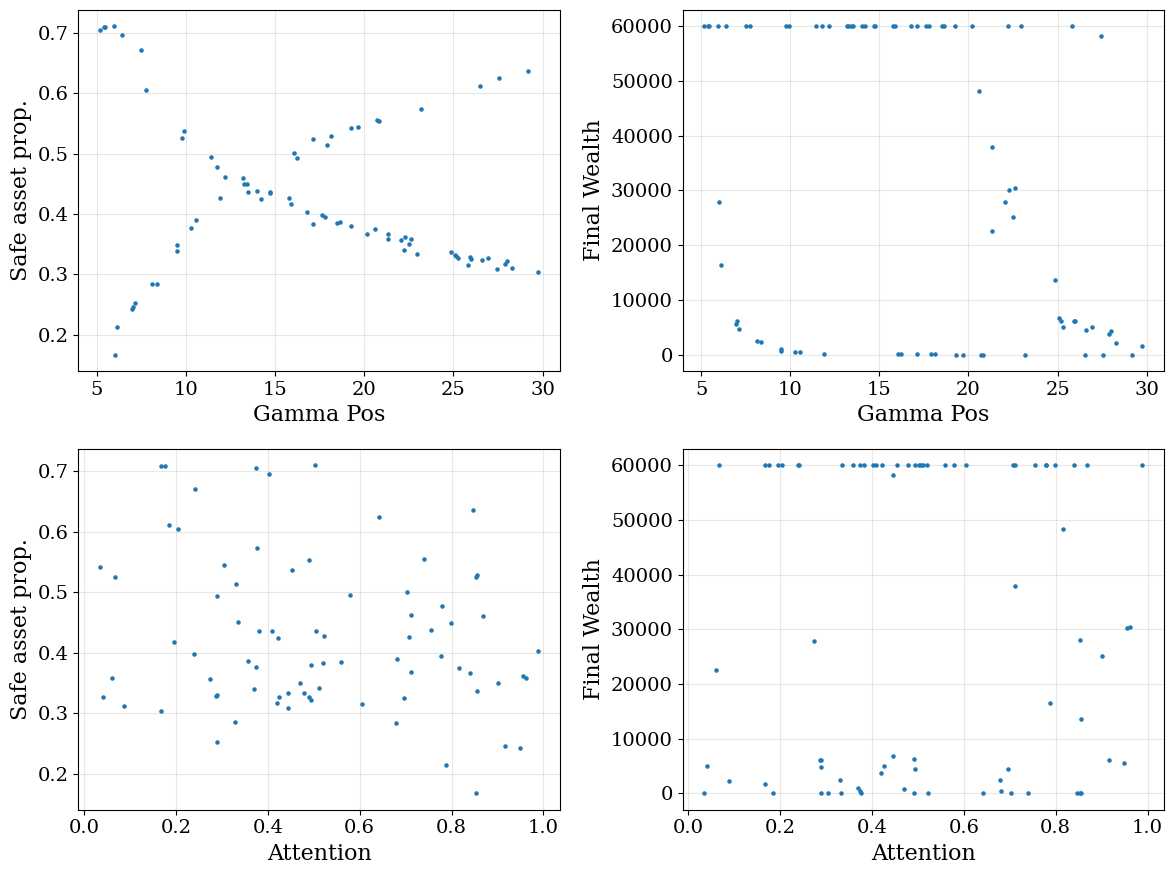

In [387]:
fig, axs = plt.subplots(2,2, figsize=(12,9))

comm_idx = 23

axs[0][0].scatter(X[:,2][augmented_communities[comm_idx]],
               safe_investment[augmented_communities[comm_idx]],
               s=5)
axs[0][0].set_xlabel("Gamma Pos")
axs[0][0].set_ylabel("Safe asset prop.")

axs[0][1].scatter(X[:,2][augmented_communities[comm_idx]],
               d["W"][-1][augmented_communities[comm_idx]],
               s=5)
axs[0][1].set_xlabel("Gamma Pos")
axs[0][1].set_ylabel("Final Wealth")


axs[1][0].scatter(X[:,4][augmented_communities[comm_idx]],
               safe_investment[augmented_communities[comm_idx]],
               s=5)
axs[1][0].set_xlabel("Attention")
axs[1][0].set_ylabel("Safe asset prop.")


axs[1][1].scatter(X[:,4][augmented_communities[comm_idx]],
               d["W"][-1][augmented_communities[comm_idx]],
               s=5)
axs[1][1].set_xlabel("Attention")
axs[1][1].set_ylabel("Final Wealth")

fig.tight_layout()
plt.show()

In [467]:
with open("./regime.pickle", "rb") as f:
    RR = pickle.load(f)

In [517]:
np.where(RR==1)

(array([ 0,  0,  0, ..., 19, 19, 19]),
 array([   0,    1,    2, ..., 7165, 7166, 7167]))

In [580]:
seed = 0
param = 17

d = pickle.load(lzma.open(f"DATA/nodebt/new_model_runs_paper_{seed}/{seed}_{param+1}_paper.pkl.lzma"))
alpha_val = d["params"][4]
data_W = d["W"]
gamma_pos = np.array([x.gamma_pos for x in d["U"]])

with open(f"sda_graphs/{seed}_{alpha_val}.pickle", "rb") as f:
    _, community_membership, _, _ = pickle.load(f)
    

unique_project_combinations = {}
for agent, agent_comm in community_membership.items():
    combo = tuple(sorted(agent_comm))
    if combo not in unique_project_combinations:
        unique_project_combinations[combo] = [agent]
    else:
        unique_project_combinations[combo].append(agent)

SignificanceResult(statistic=0.29309207758329225, pvalue=0.0015525313487504105)


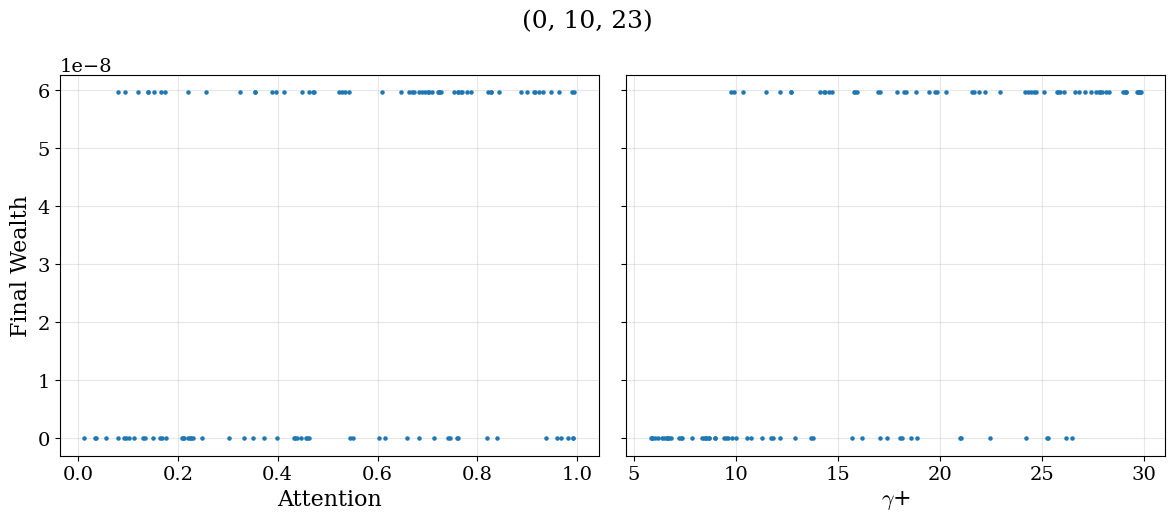

SignificanceResult(statistic=-0.23921985273321028, pvalue=0.006123389081749998)


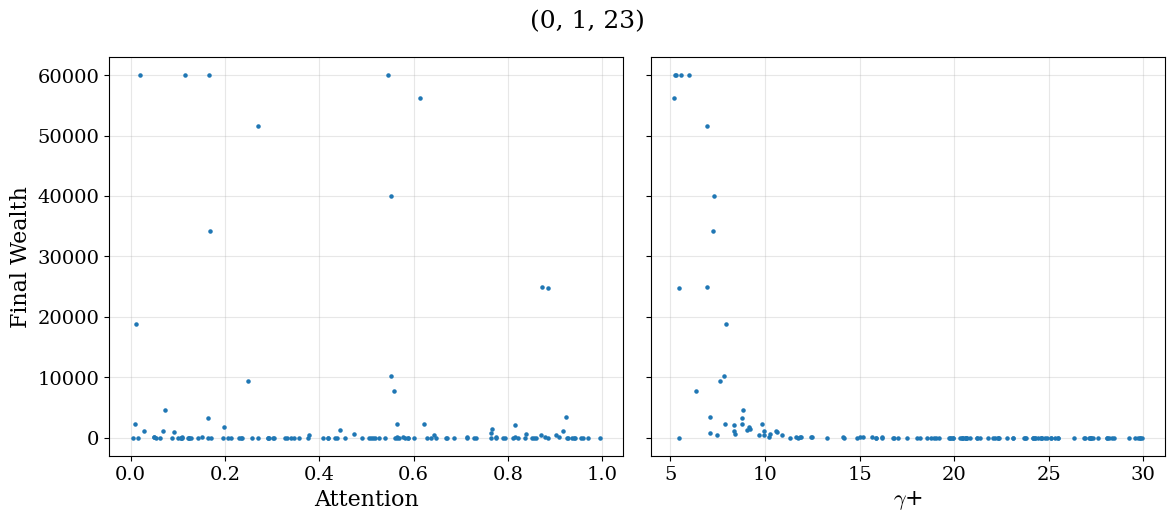

SignificanceResult(statistic=-0.06618204706139227, pvalue=0.6549279829026131)


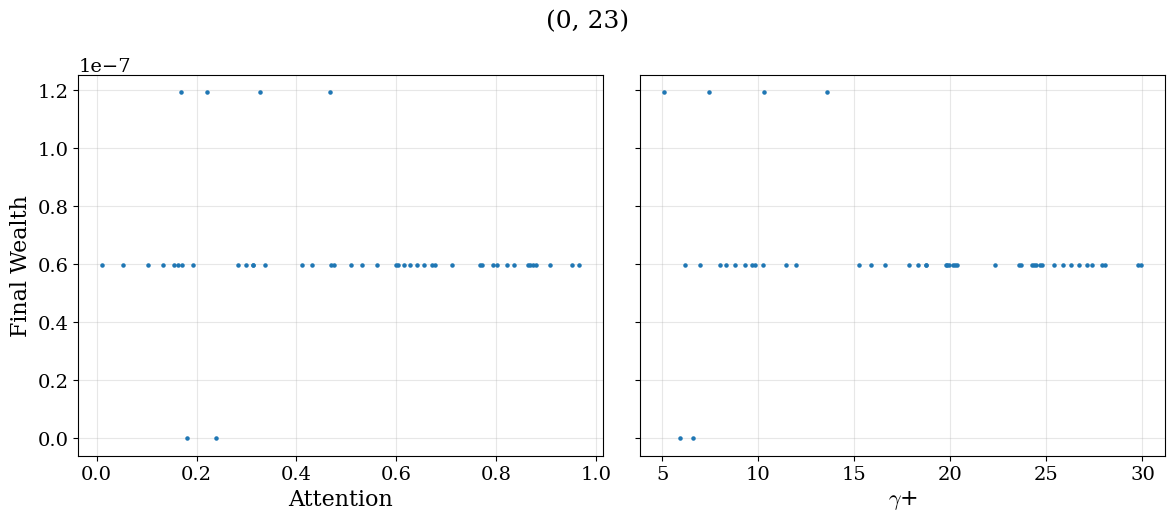

SignificanceResult(statistic=nan, pvalue=nan)


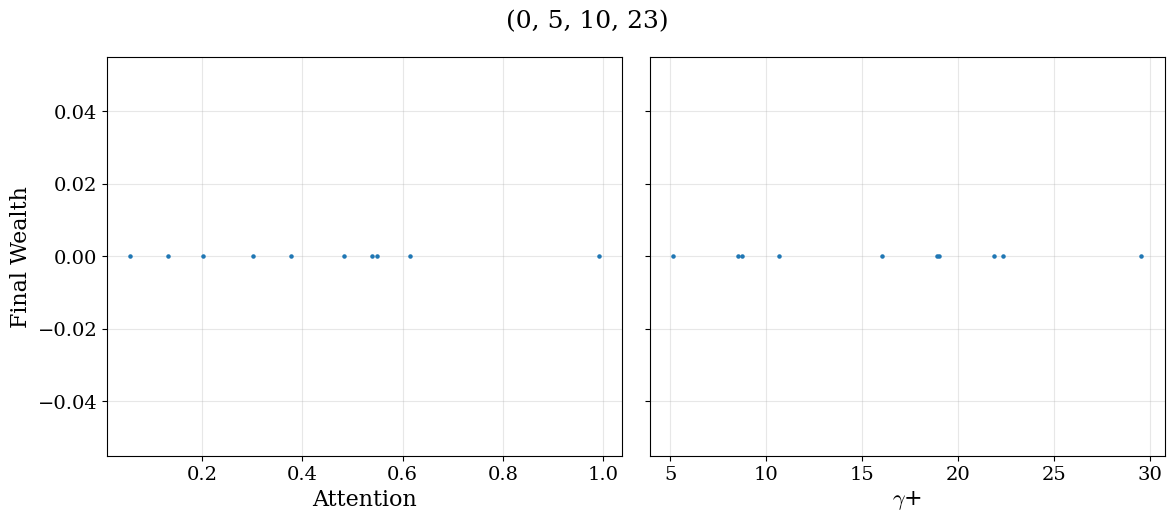

SignificanceResult(statistic=-0.03559713565670817, pvalue=0.7419588106473706)


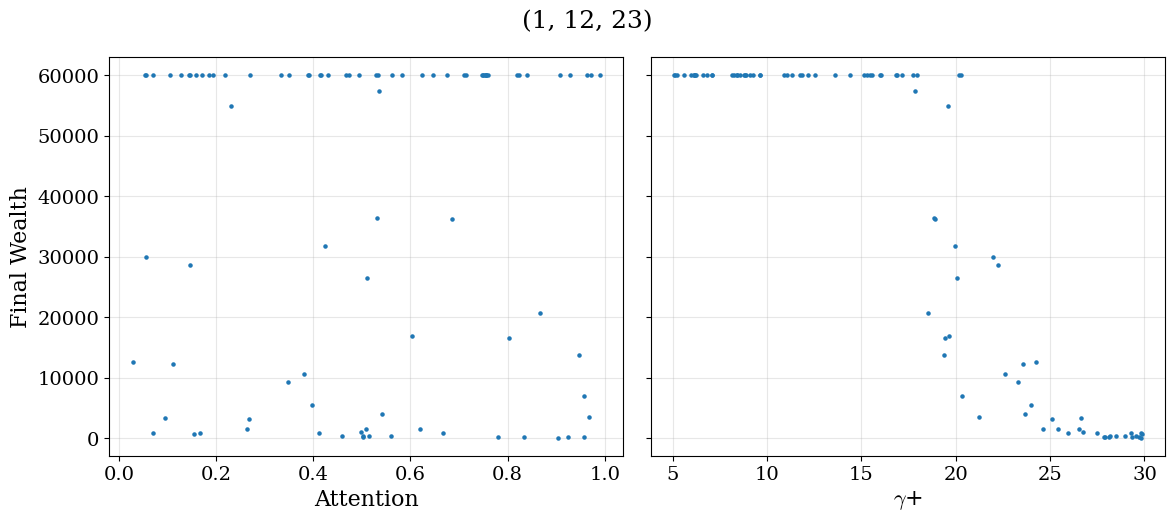

SignificanceResult(statistic=-0.3277716443855532, pvalue=0.15830828286868767)


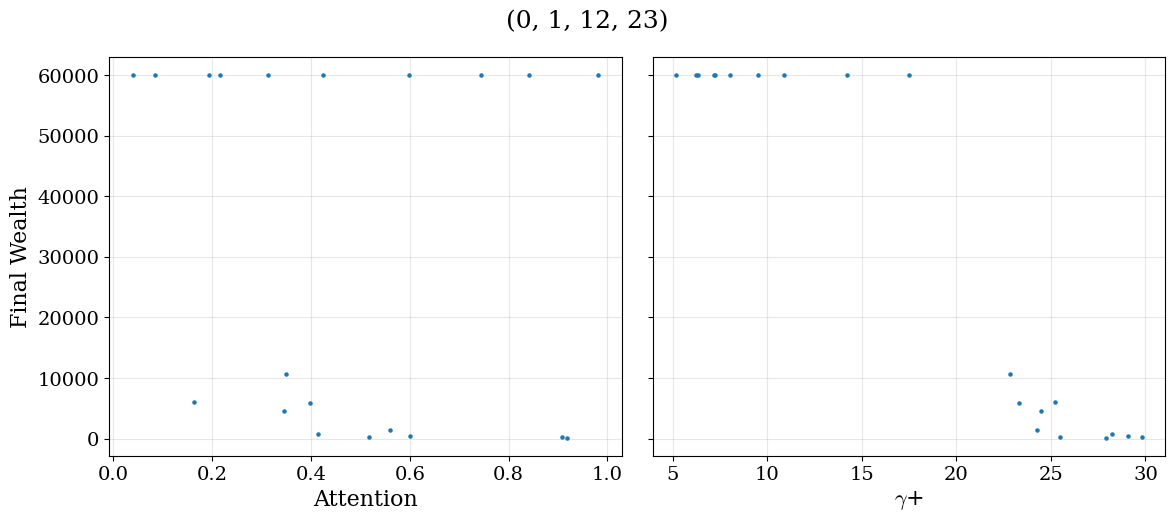

SignificanceResult(statistic=-0.11818181818181818, pvalue=0.72928477951978)


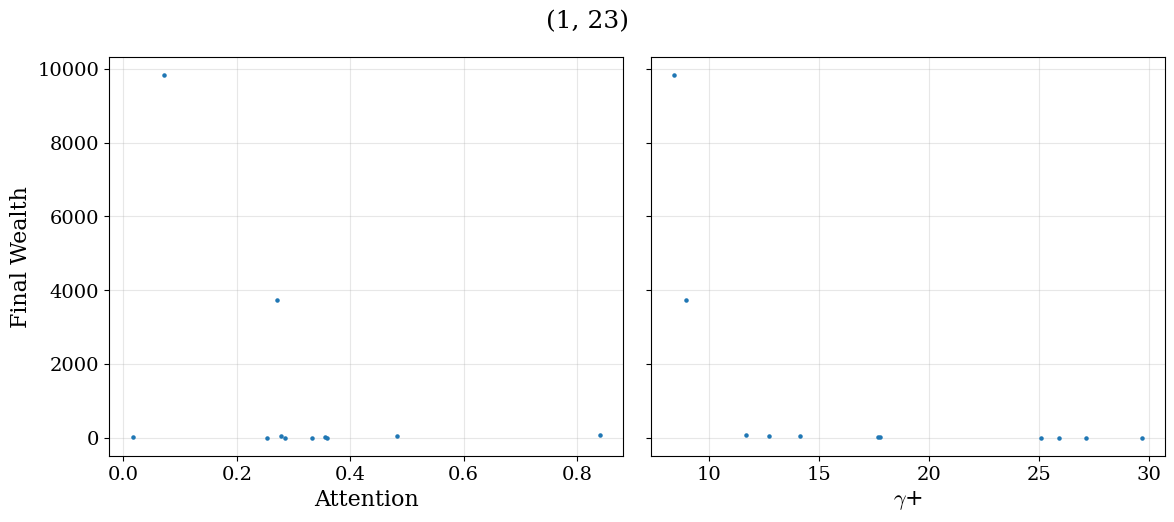

SignificanceResult(statistic=0.19614741113473694, pvalue=0.5412137259515317)


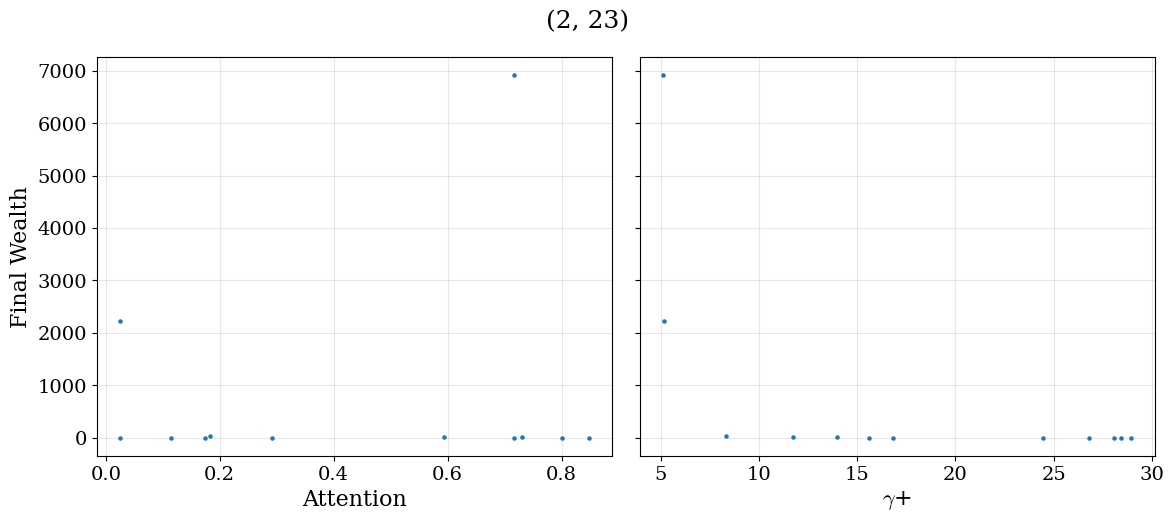

SignificanceResult(statistic=0.9574574226576713, pvalue=1.6870145764914912e-09)


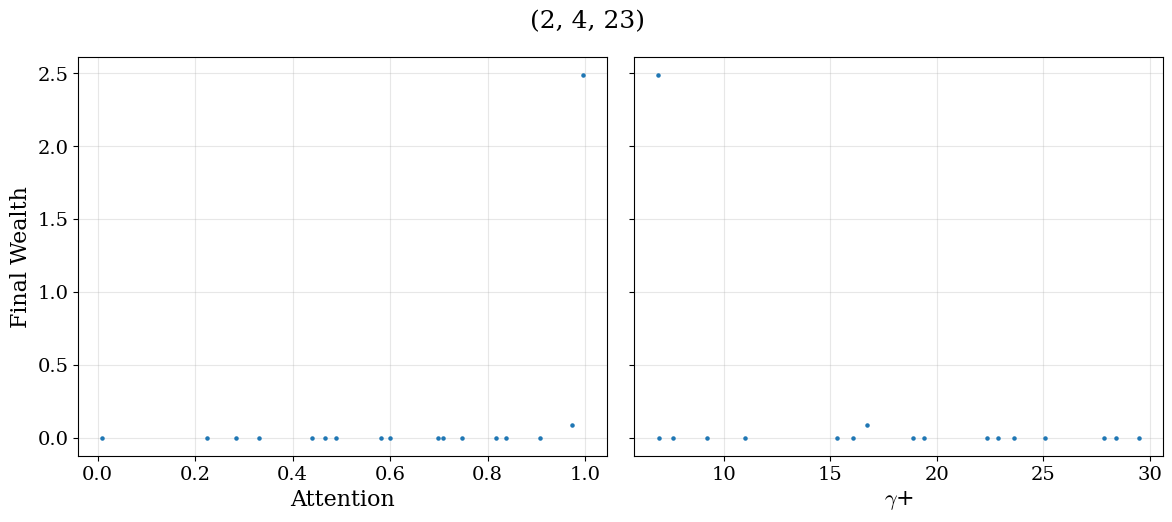

SignificanceResult(statistic=0.25379813530296264, pvalue=0.36137235102793996)


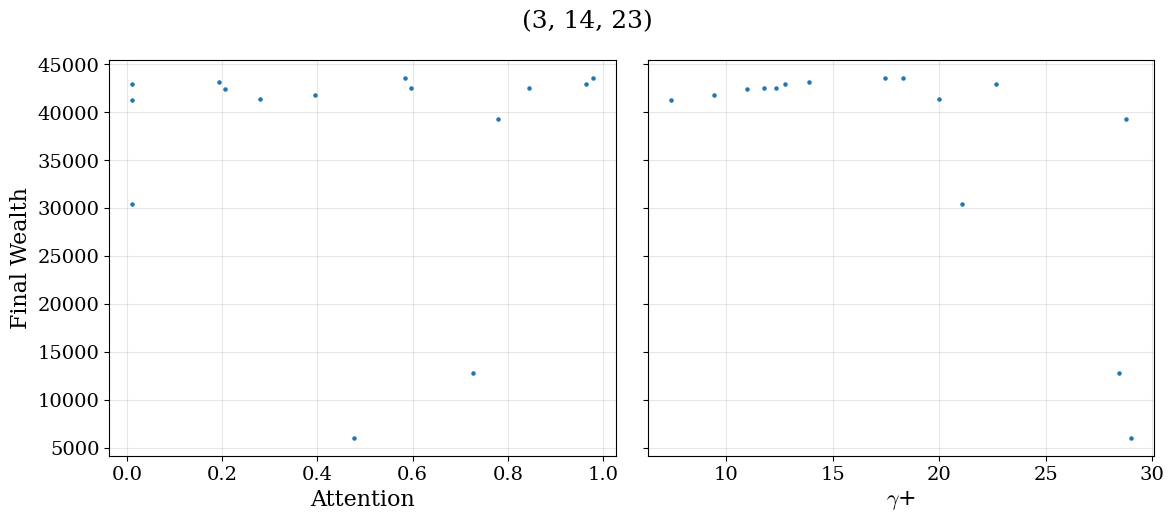

SignificanceResult(statistic=0.9270538235505094, pvalue=1.8562318021973378e-06)


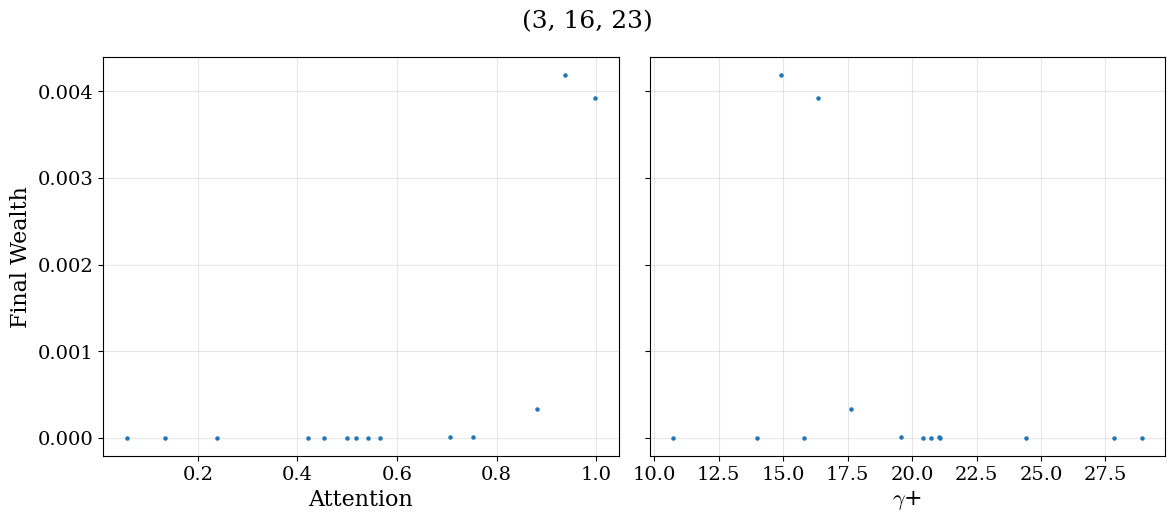

SignificanceResult(statistic=0.4451302263229461, pvalue=0.1973570541531603)


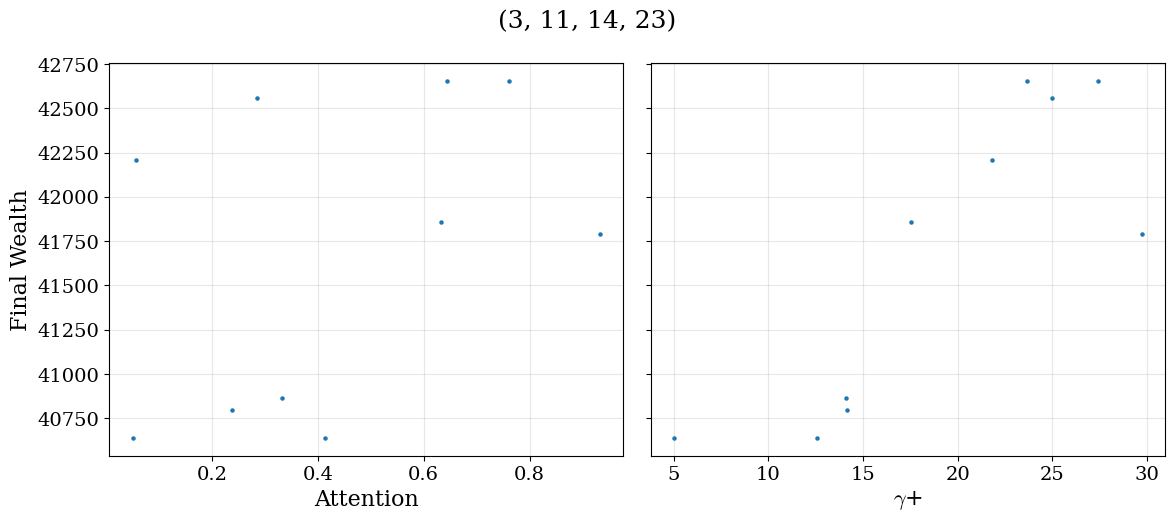

SignificanceResult(statistic=0.32796802467631514, pvalue=0.21493361365800898)


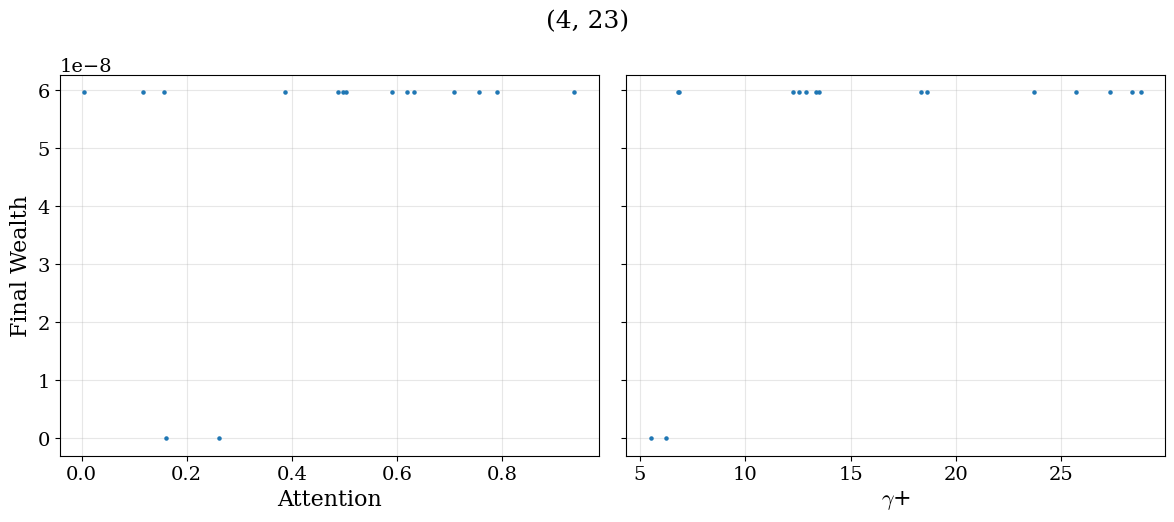

SignificanceResult(statistic=0.7515758333658544, pvalue=2.299500760449519e-05)


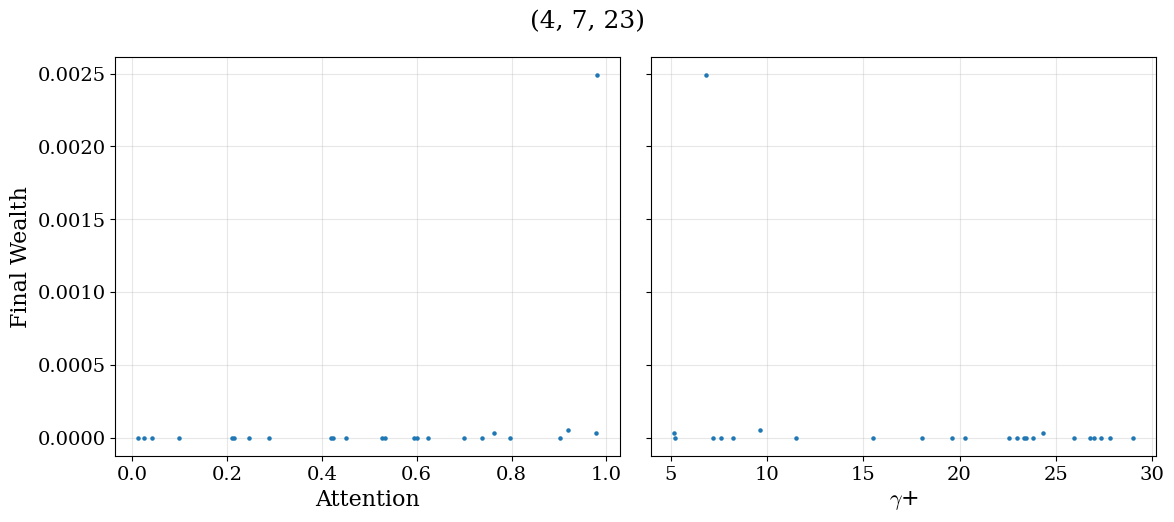

SignificanceResult(statistic=0.7492286018883351, pvalue=3.209904783793018e-09)


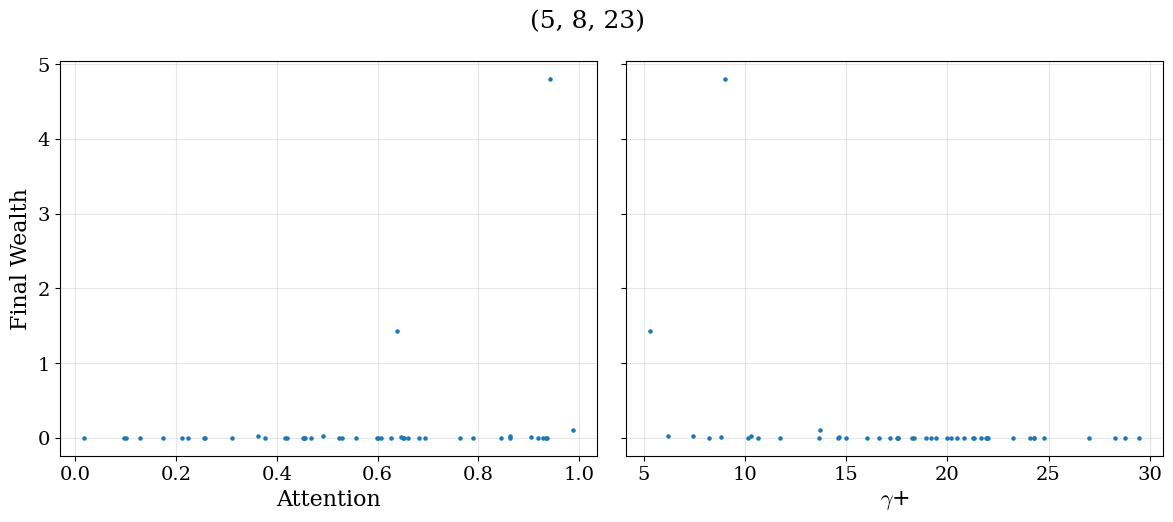

SignificanceResult(statistic=0.7370243523896769, pvalue=6.665825409279113e-07)


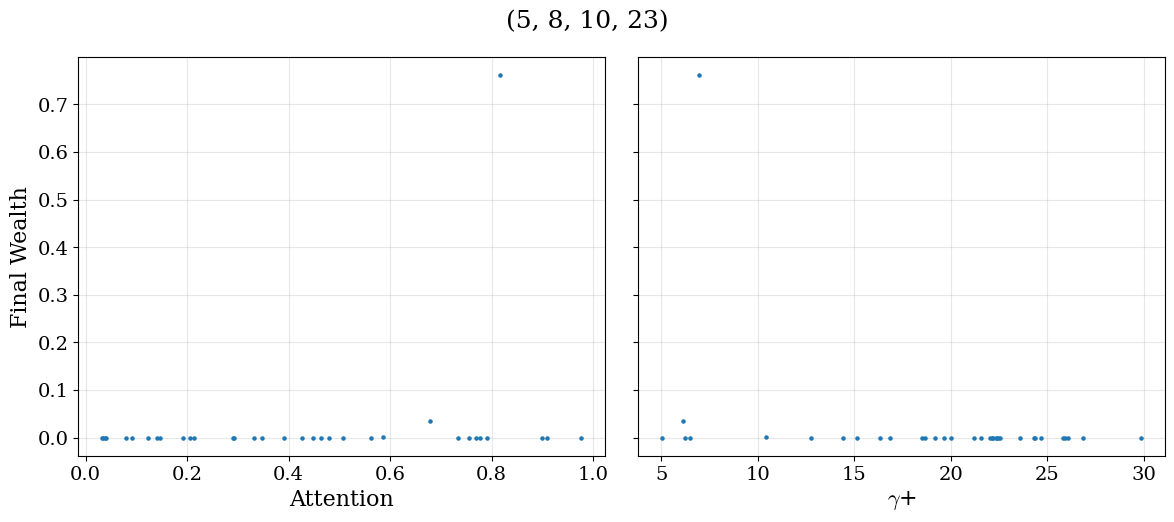

SignificanceResult(statistic=0.19753686010274876, pvalue=0.16040631093124103)


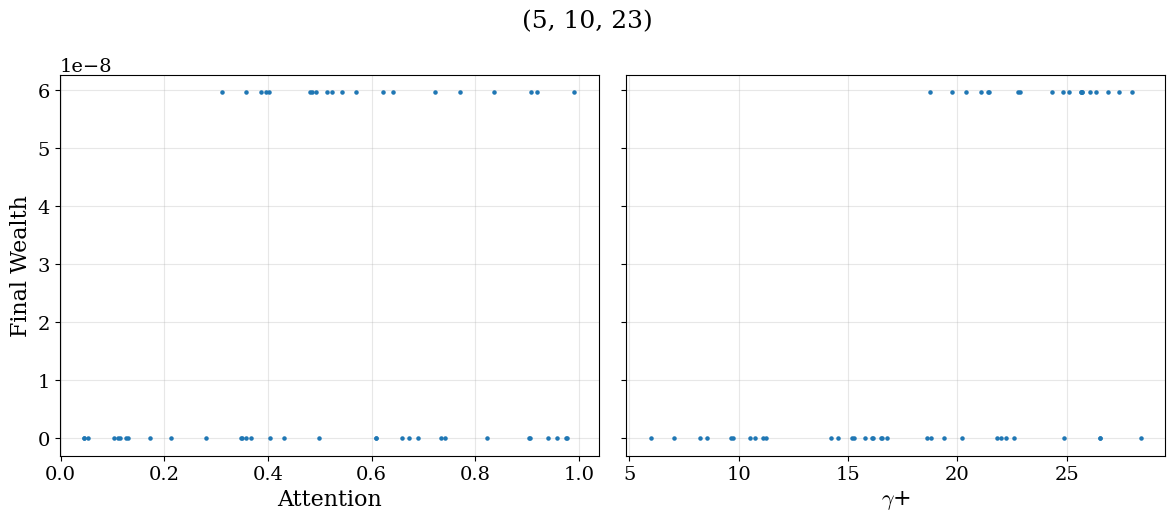

SignificanceResult(statistic=0.23956043956043957, pvalue=0.4094298928517326)


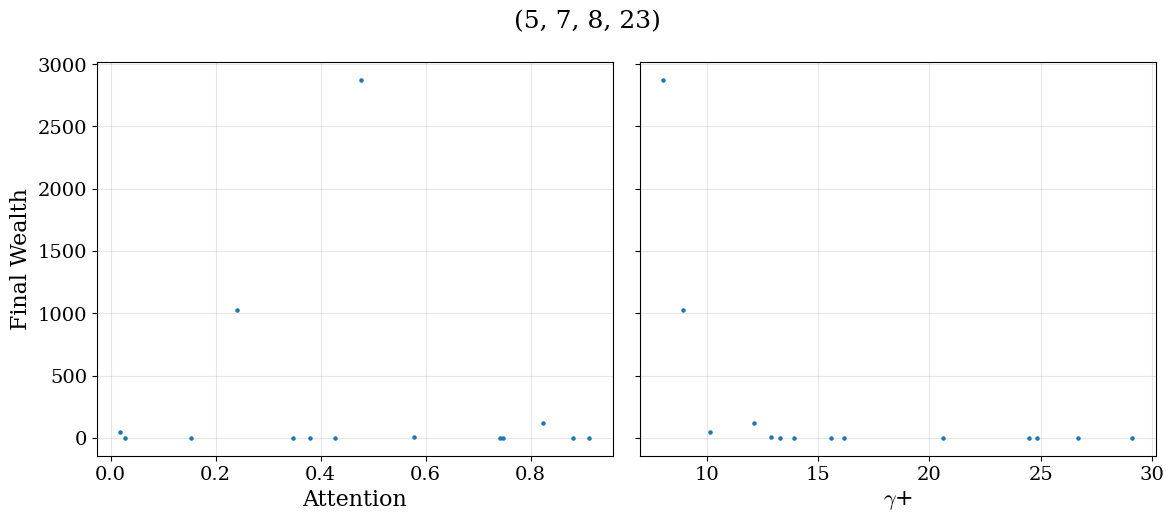

SignificanceResult(statistic=-0.01294452347083926, pvalue=0.9122312697903102)


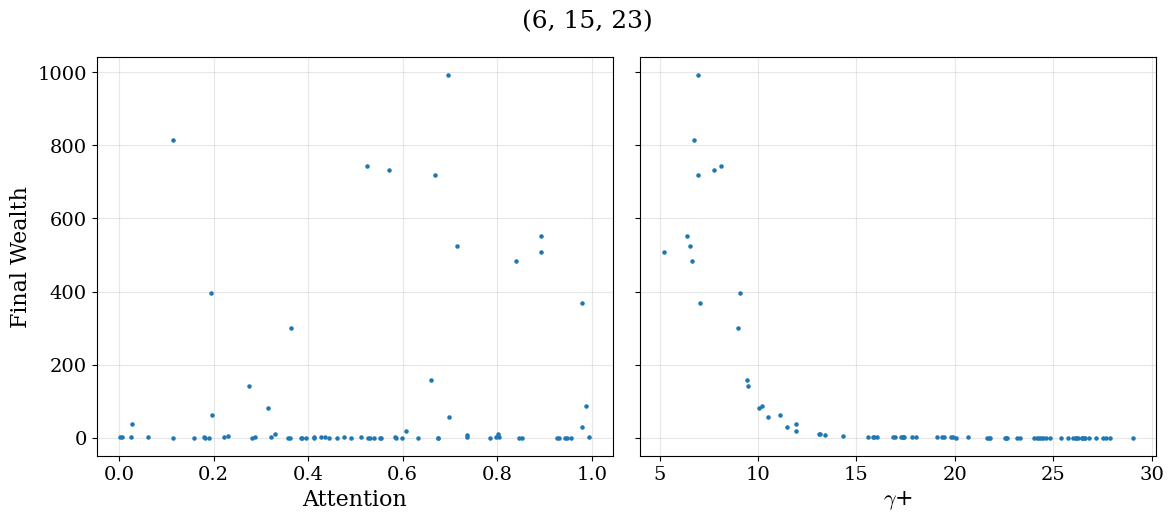

SignificanceResult(statistic=0.04056949050548507, pvalue=0.7123916084714799)


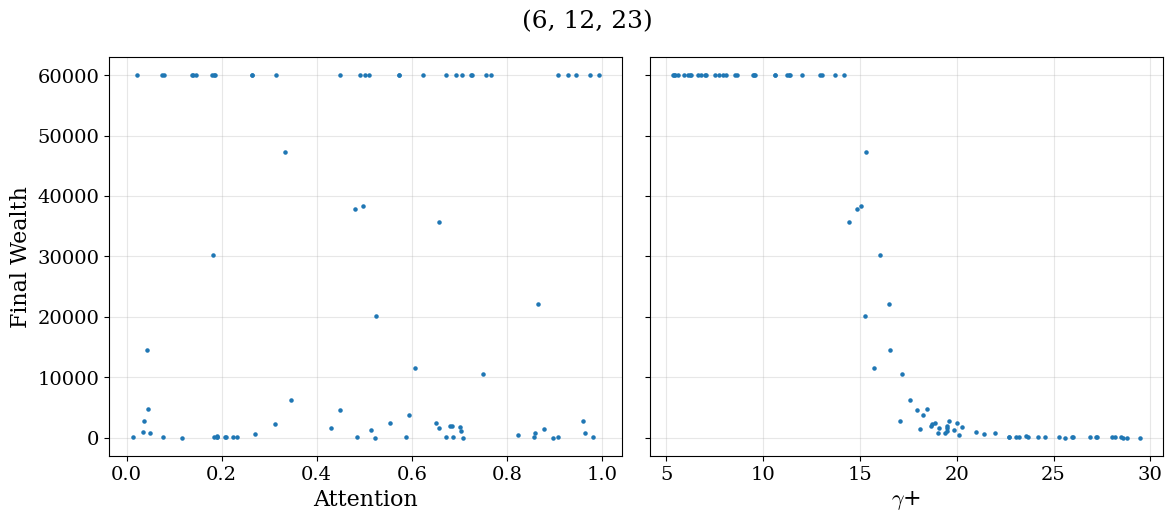

SignificanceResult(statistic=-0.3498179066446536, pvalue=0.0249600178142768)


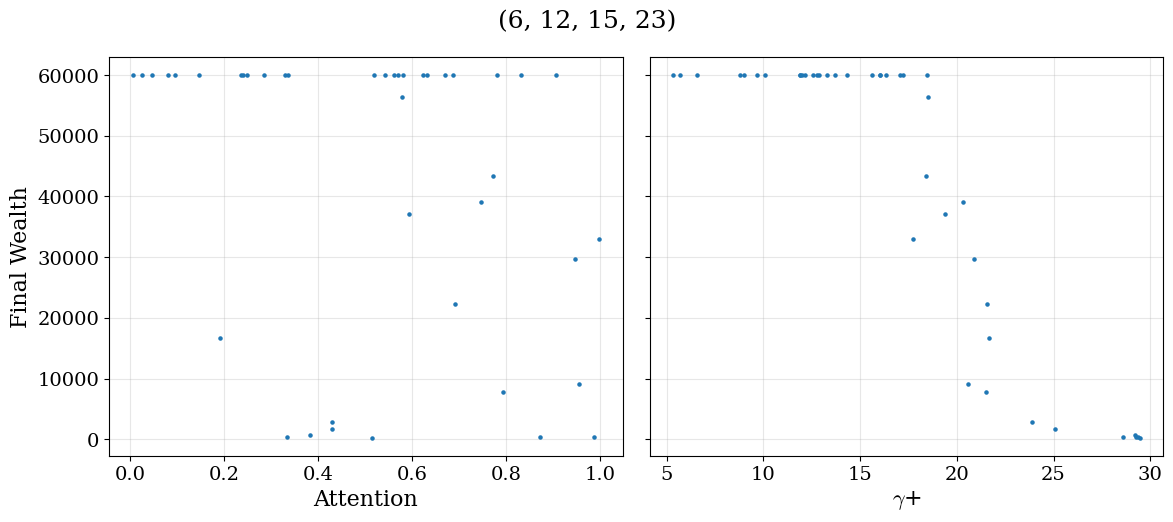

SignificanceResult(statistic=0.08964059196617334, pvalue=0.562820242122546)


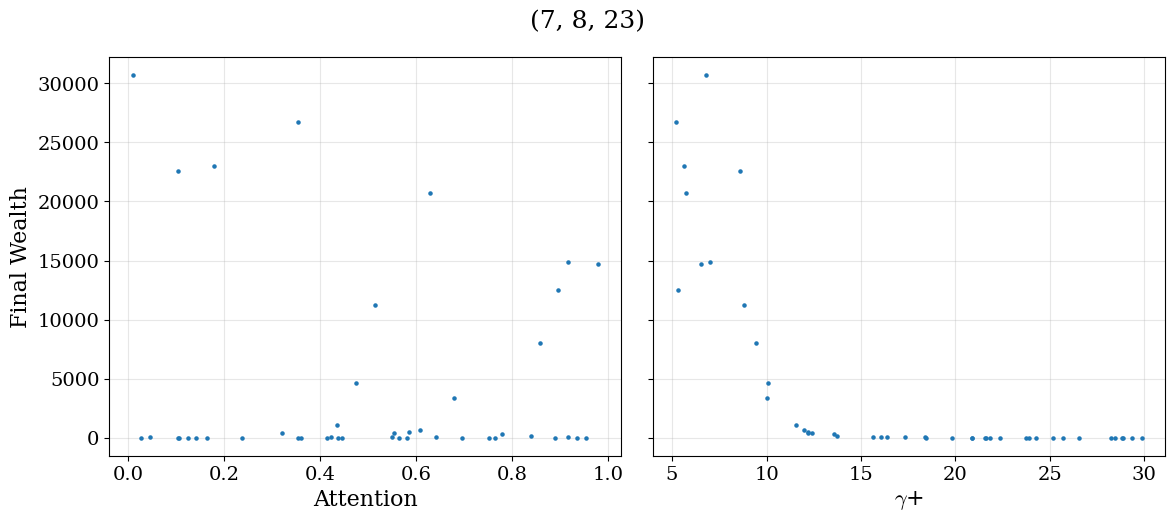

SignificanceResult(statistic=-0.03366634765344262, pvalue=0.8649539759734227)


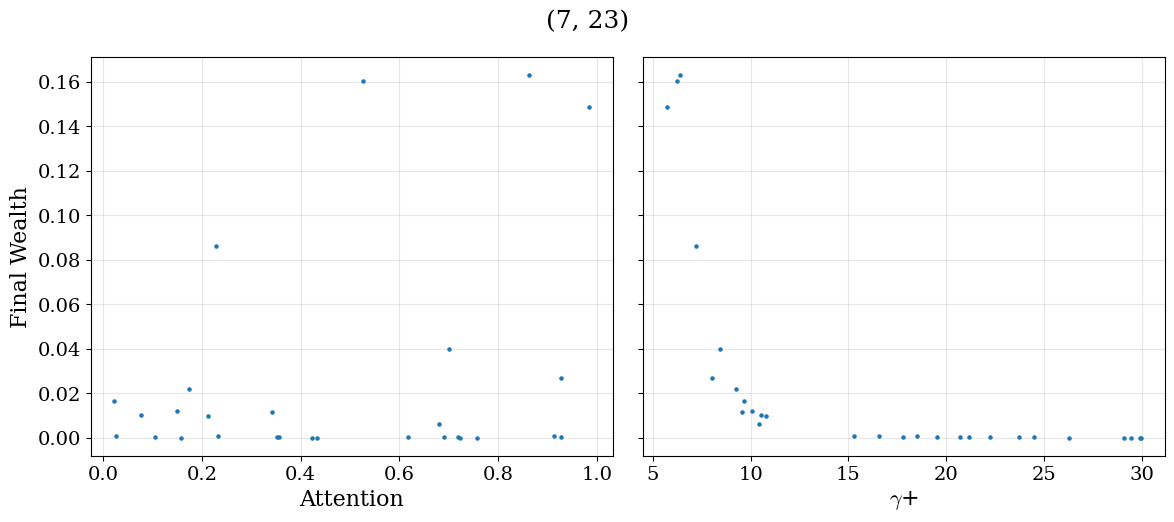

SignificanceResult(statistic=0.3484579241475013, pvalue=0.09517093601659955)


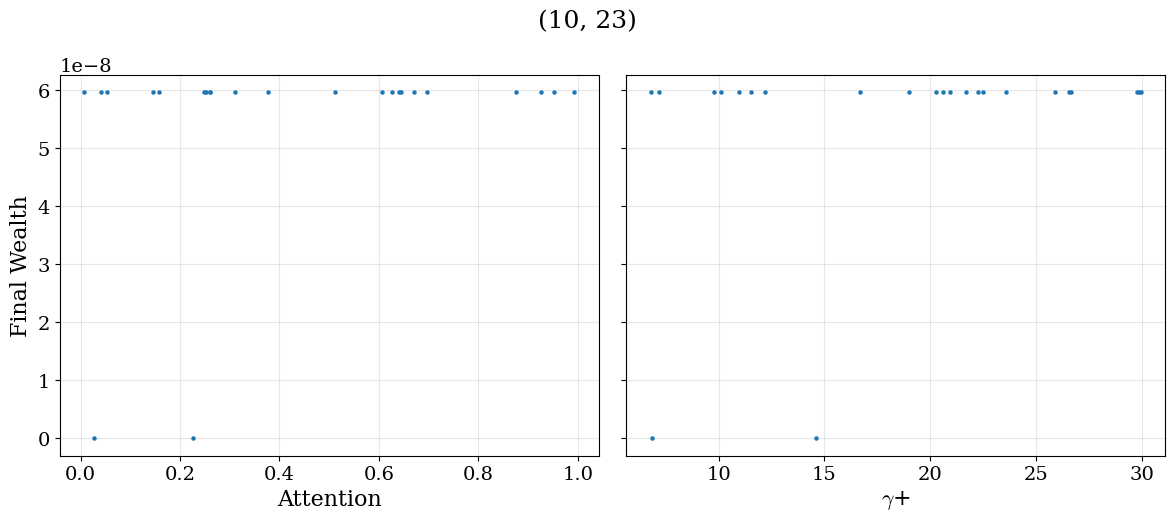

SignificanceResult(statistic=0.23716704161944657, pvalue=0.3005993462228091)


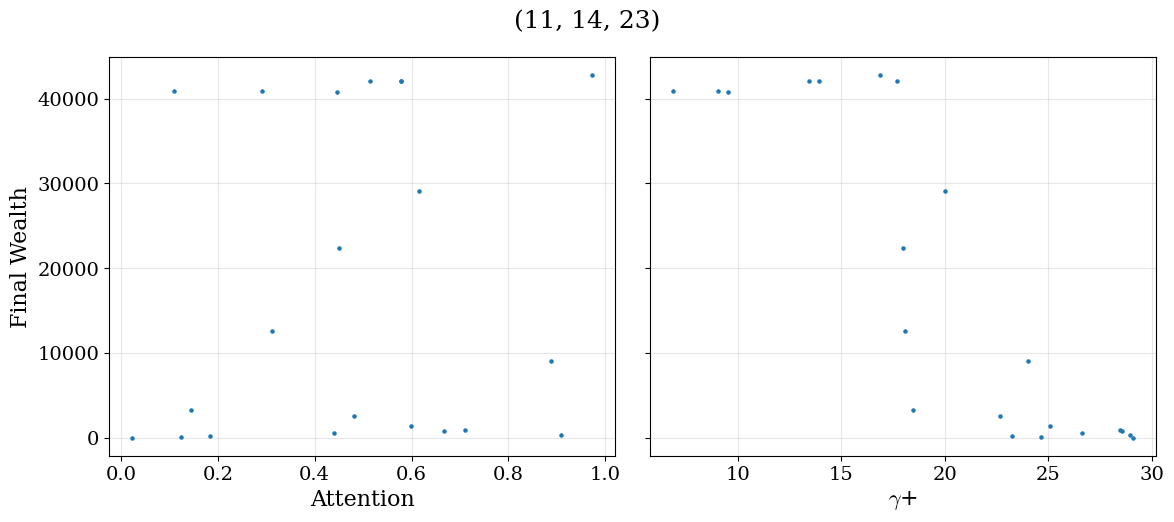

SignificanceResult(statistic=0.308695652173913, pvalue=0.1421899144300473)


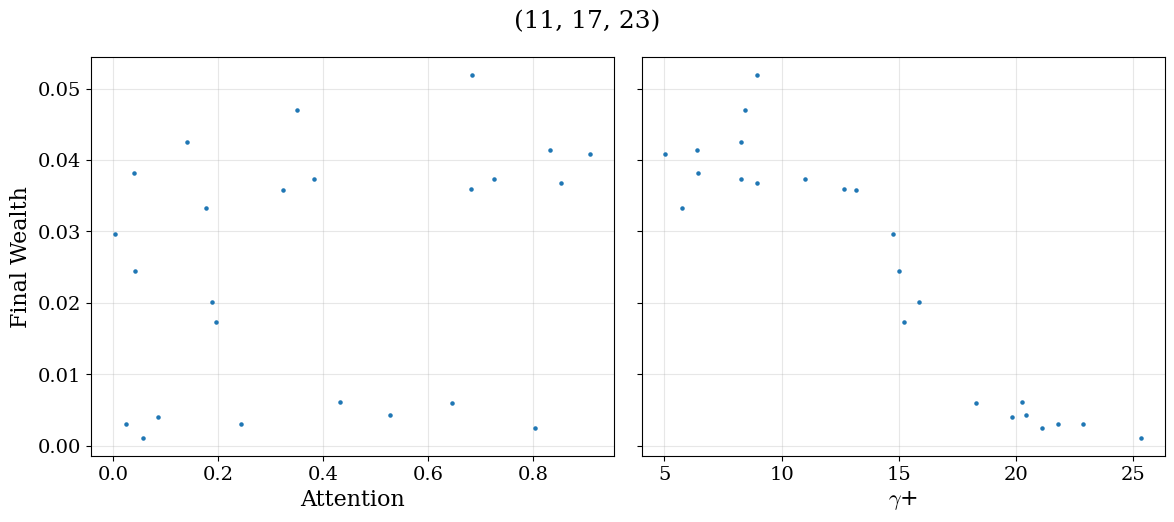

SignificanceResult(statistic=-0.35639097744360904, pvalue=0.12298631080226882)


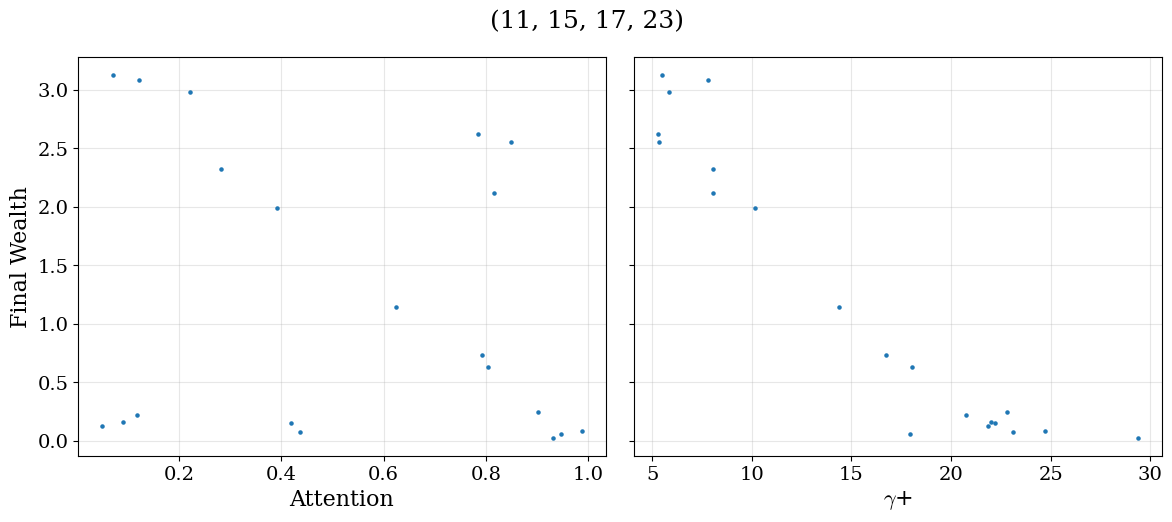

SignificanceResult(statistic=-0.28478632478632476, pvalue=0.15850693426664988)


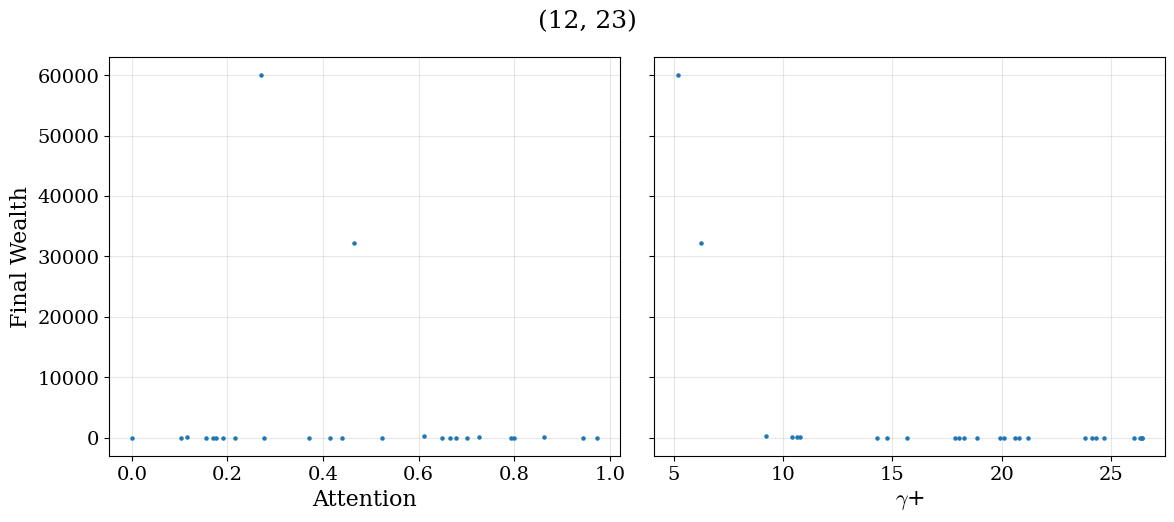

SignificanceResult(statistic=0.13940886699507385, pvalue=0.4707554883316435)


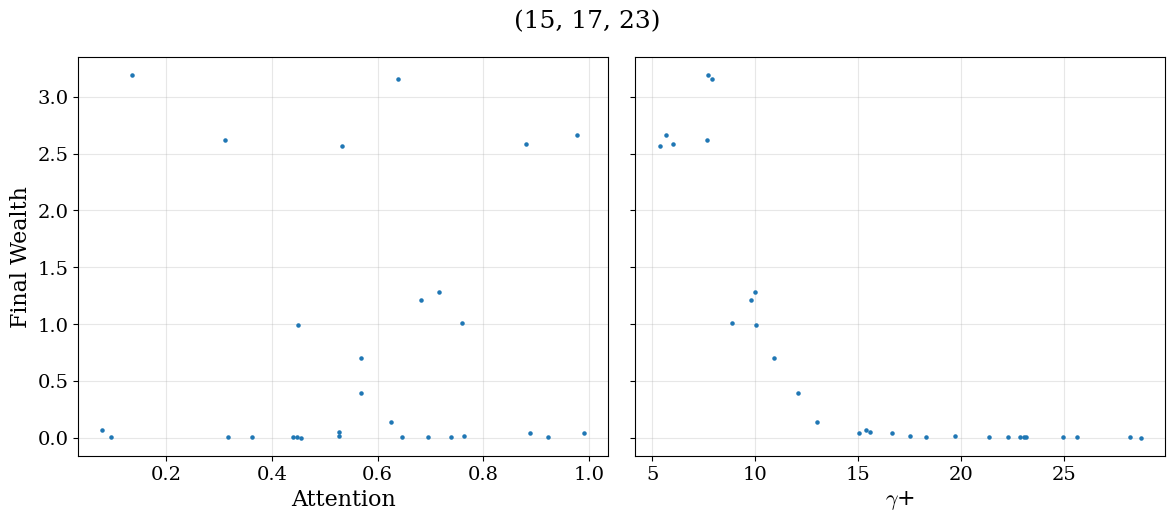

SignificanceResult(statistic=0.3974271283967373, pvalue=0.03623786484450747)


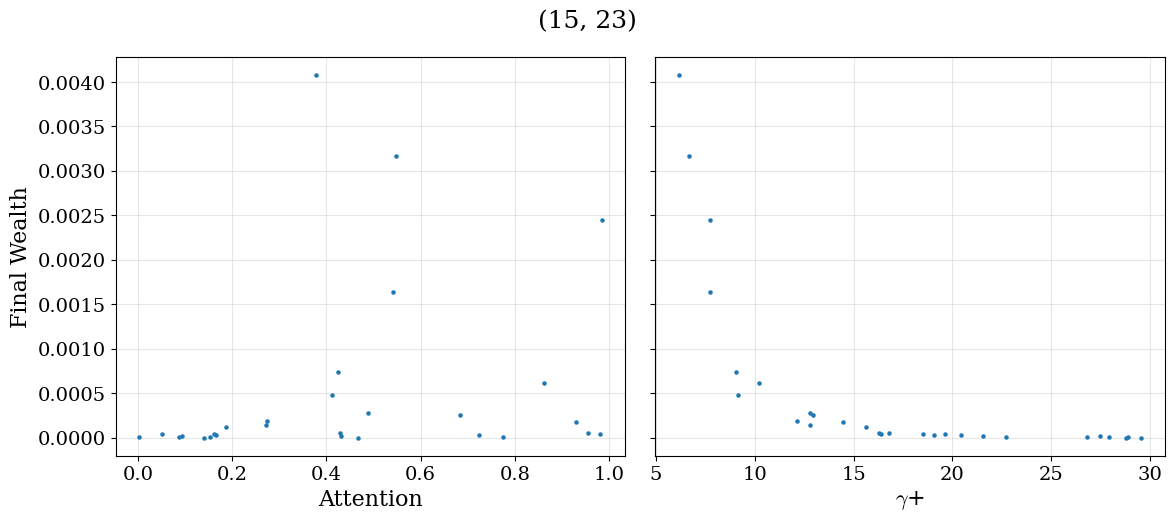

SignificanceResult(statistic=0.3418817293789138, pvalue=0.33358700175210276)


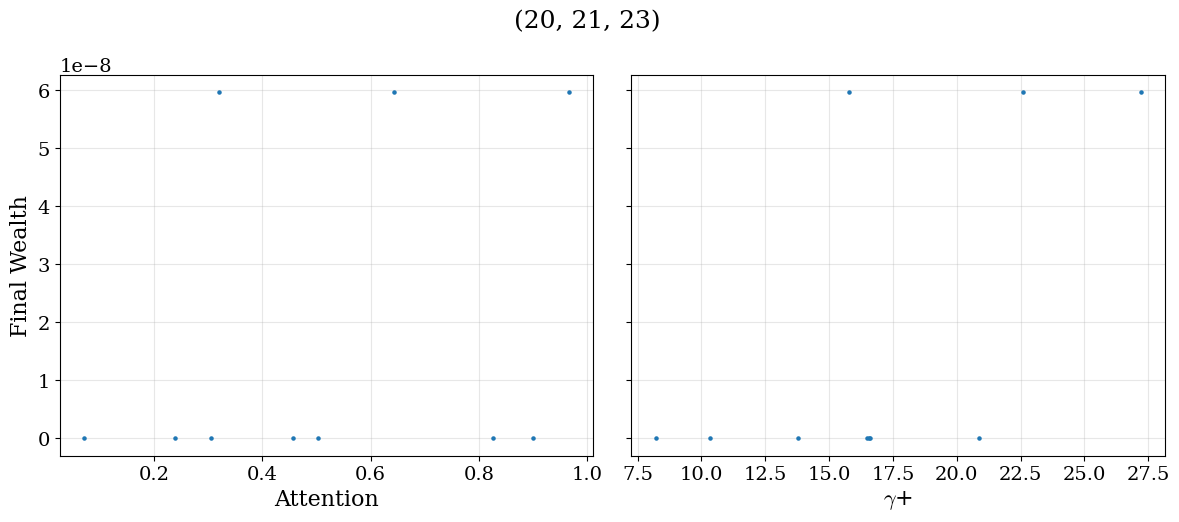

In [586]:
for key, idx in unique_project_combinations.items():
    
    if len(idx) < 10:
        continue
        
    spr = spearmanr(d["A"][idx].reshape(-1,1), d["W"][-1][idx].astype(np.float32))
    print(spr)
    
    fig, axs = plt.subplots(1,2, figsize=(12,5), sharey=True)
    axs[0].scatter(d["A"][idx], d["W"][-1][idx], s=5)
    axs[0].set_xlabel("Attention")
    axs[0].set_ylabel("Final Wealth")

    axs[1].scatter(gamma_pos[idx], d["W"][-1][idx], s=5)
    axs[1].set_xlabel(r"$\gamma$+")

    fig.tight_layout()
    plt.suptitle(key, y=1.05)
    plt.show()

# Results

In [3]:
with open("attention_results.pickle", "rb") as f:
    result = pickle.load(f)

In [4]:
regime = 1

sorted_mi_items = sorted(result[regime], key=lambda x: x[0])

item = sorted_mi_items[-1]

s, p = item[1], item[2] + 1

In [5]:
data = pickle.load(lzma.open(f"DATA/nodebt/new_model_runs_paper_{s}/{s}_{p}_paper.pkl.lzma"))
data_W = data["W"]

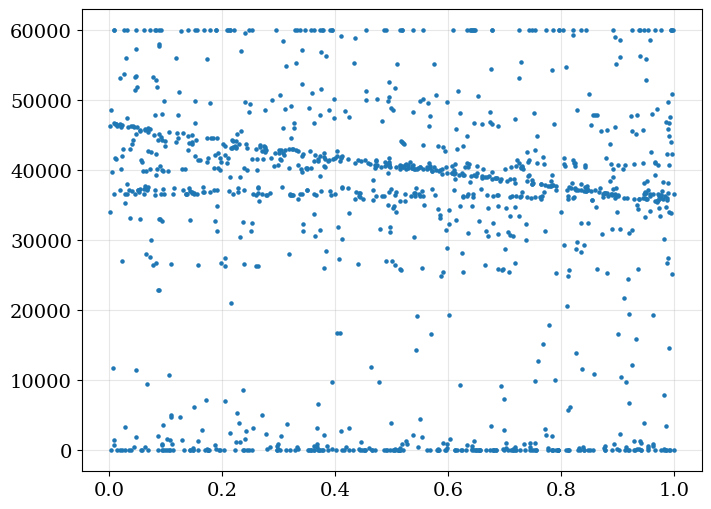

0.280695371087881

In [8]:
plt.scatter(data["A"], data_W[-1,:], s=5)
plt.show()
MI = mutual_info_regression(data["A"].reshape(-1,1), data["W"][-1].astype(np.float32))[0]
MI

In [53]:
alpha_val = data["params"][4]
with open(f"sda_graphs/{s}_{alpha_val}.pickle", "rb") as f:
    communities, community_membership, _, _ = pickle.load(f)

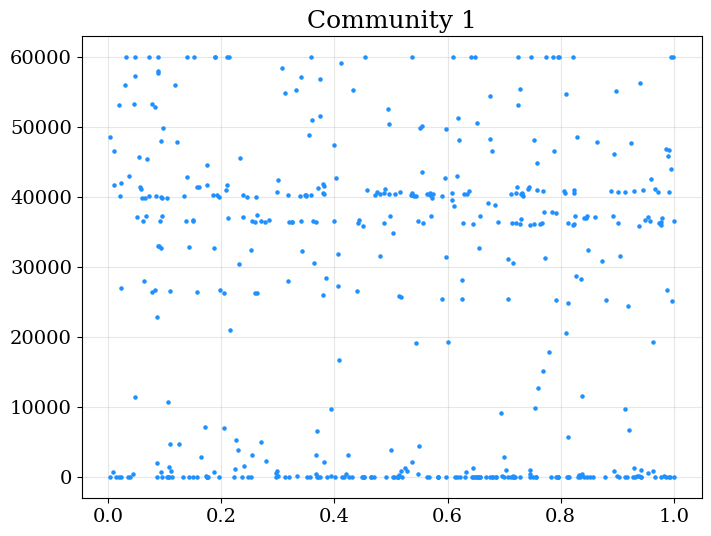

PearsonRResult(statistic=-0.0707684379291642, pvalue=0.12037191984497553)


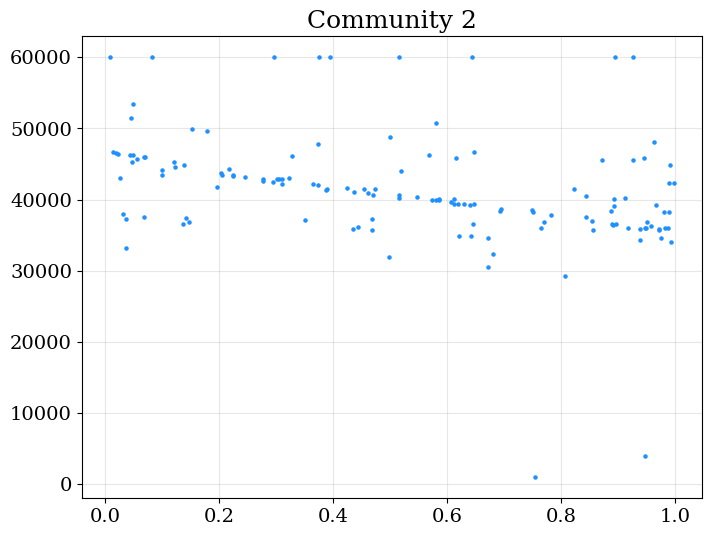

PearsonRResult(statistic=-0.3549069084599504, pvalue=1.8117673570073713e-05)


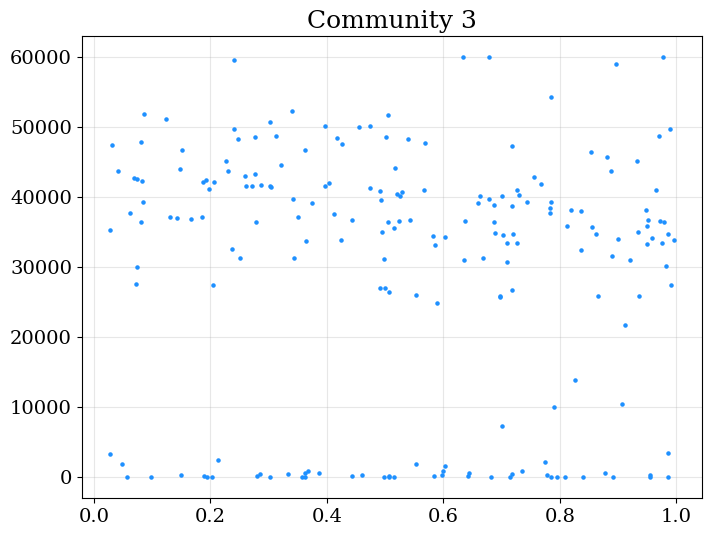

PearsonRResult(statistic=-0.07012345542204637, pvalue=0.3201448723423768)


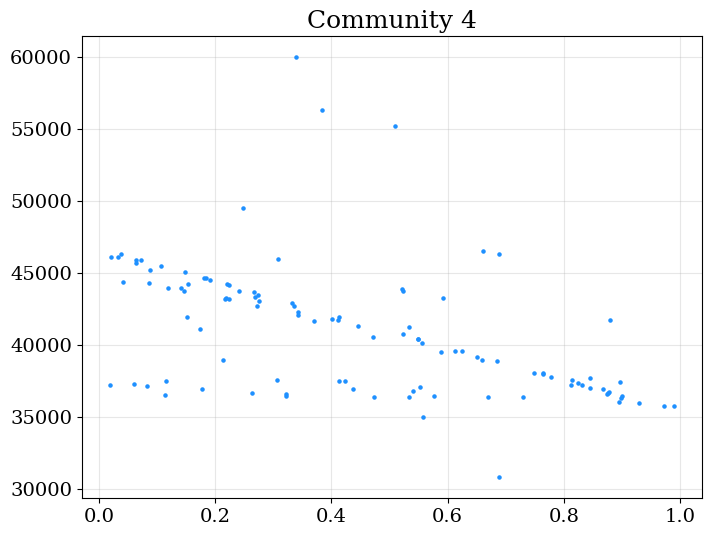

PearsonRResult(statistic=-0.49270067317313476, pvalue=7.011452900489503e-08)


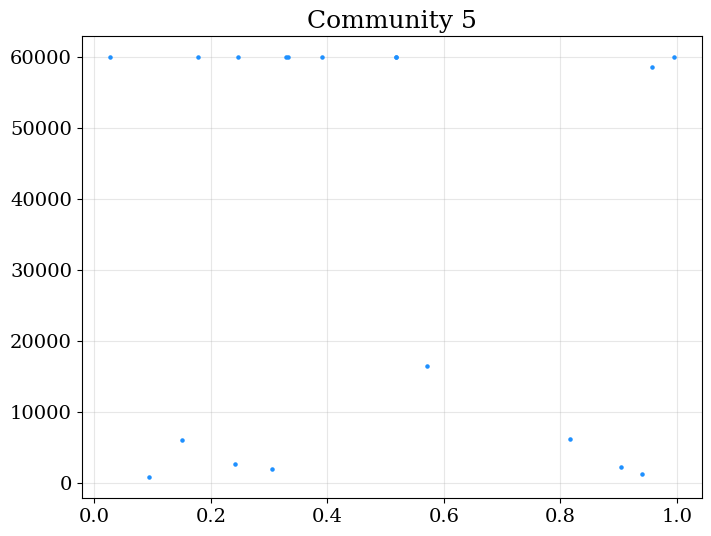

PearsonRResult(statistic=-0.08287493881498717, pvalue=0.7437214839535875)


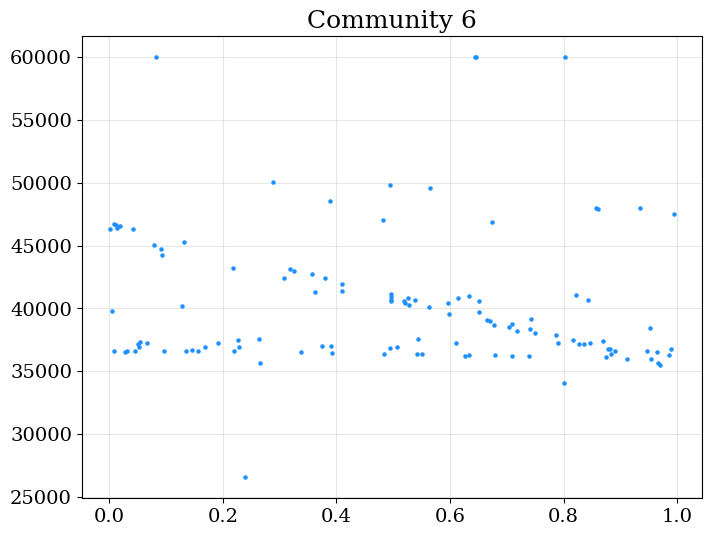

PearsonRResult(statistic=-0.11486028617127872, pvalue=0.2115917464327371)


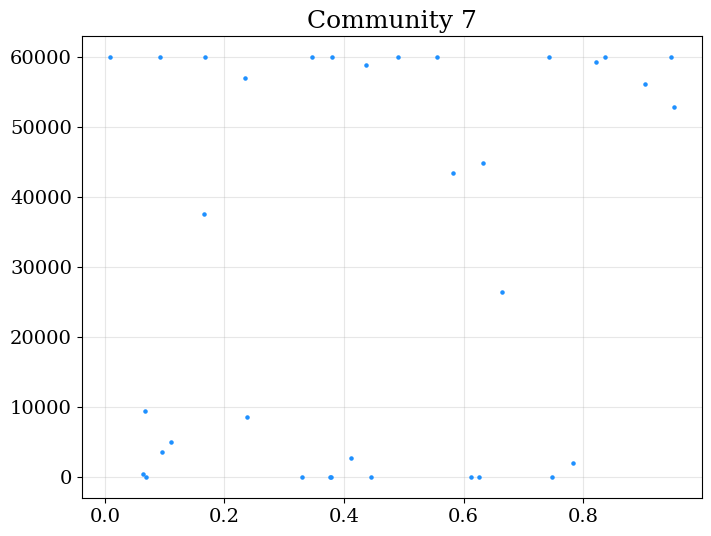

PearsonRResult(statistic=0.25111906479373114, pvalue=0.15198179555004848)


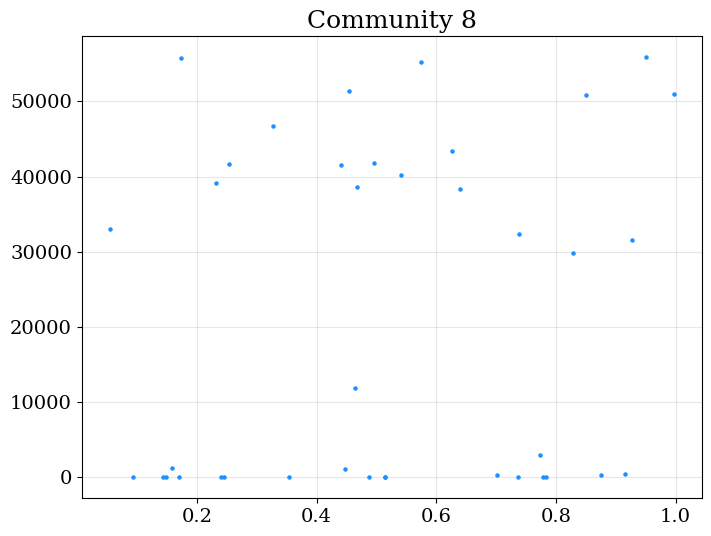

PearsonRResult(statistic=0.15092515489981537, pvalue=0.3590743359648732)


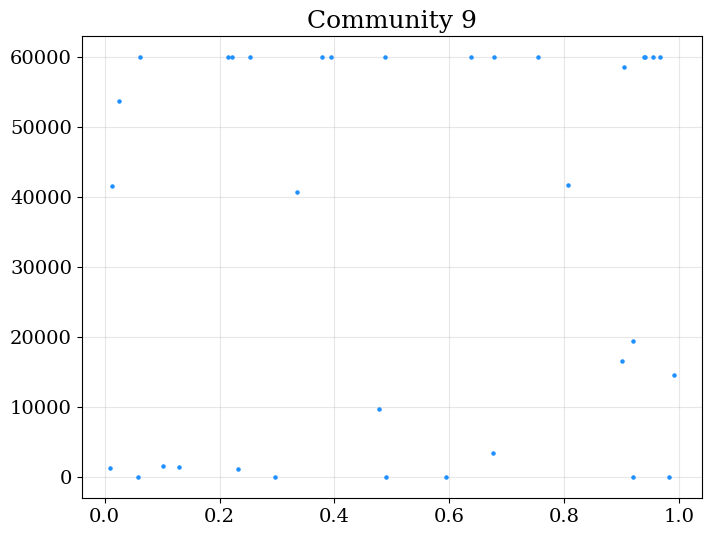

PearsonRResult(statistic=0.10332833081236285, pvalue=0.5608856607021278)


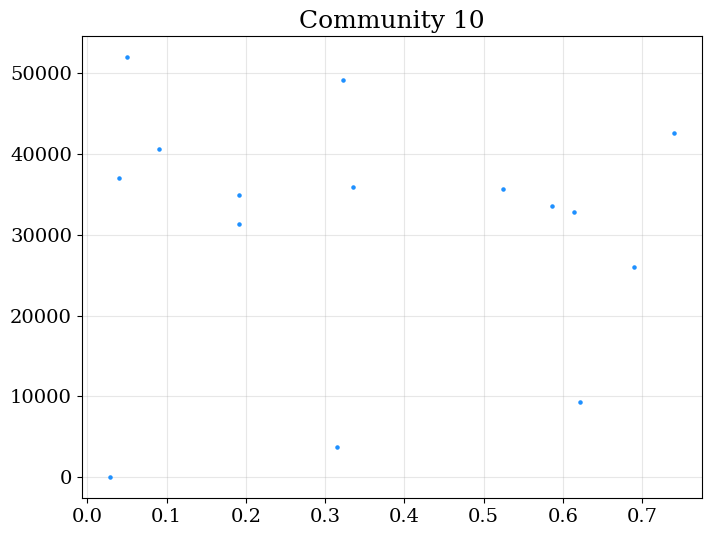

PearsonRResult(statistic=-0.03858142823838186, pvalue=0.891416961402305)


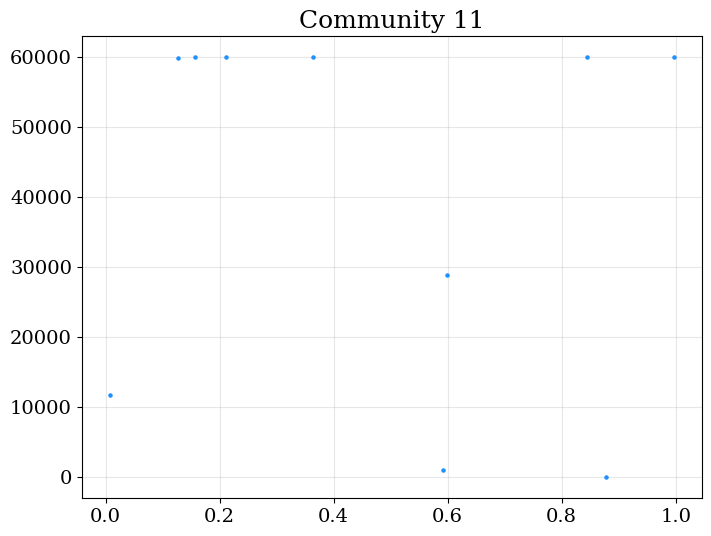

PearsonRResult(statistic=-0.13897224026219968, pvalue=0.7018017736489455)


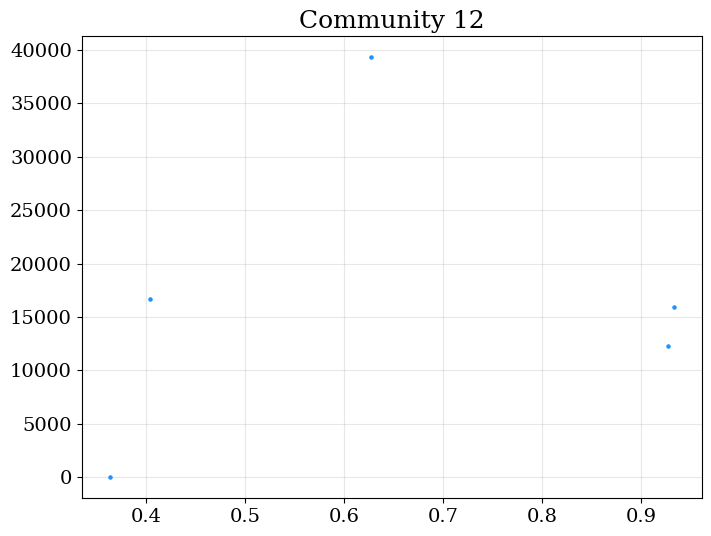

PearsonRResult(statistic=0.18041116145889236, pvalue=0.7715456195072415)


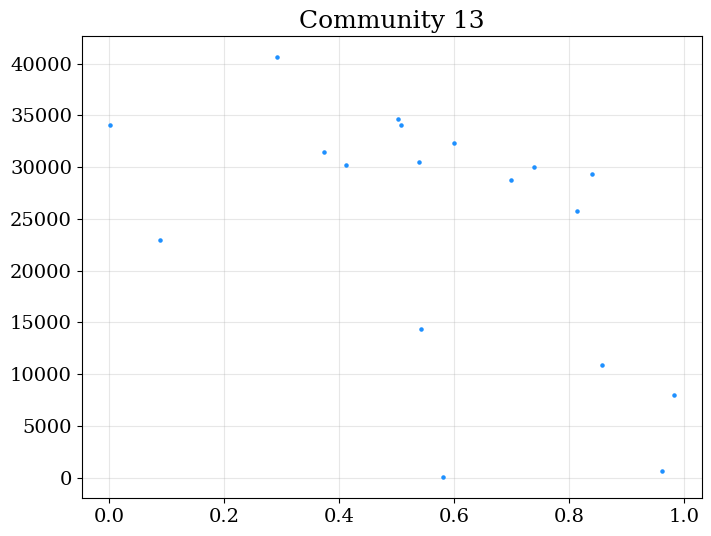

PearsonRResult(statistic=-0.518321109195907, pvalue=0.02754849723160108)


In [54]:
for i,c in enumerate(communities):
    idx = np.array(list(c))
    plt.scatter(data["A"][idx], data["W"][-1,idx], s=5, color="dodgerblue")    
    plt.title(f"Community {i+1}")
    plt.show()
    print(pearsonr(data["A"][idx], data["W"][-1,idx]))

# Results (grouped attention MI by community)

In [3]:
with open("attention_results_by_comm.pickle", "rb") as f:
    data = pickle.load(f)

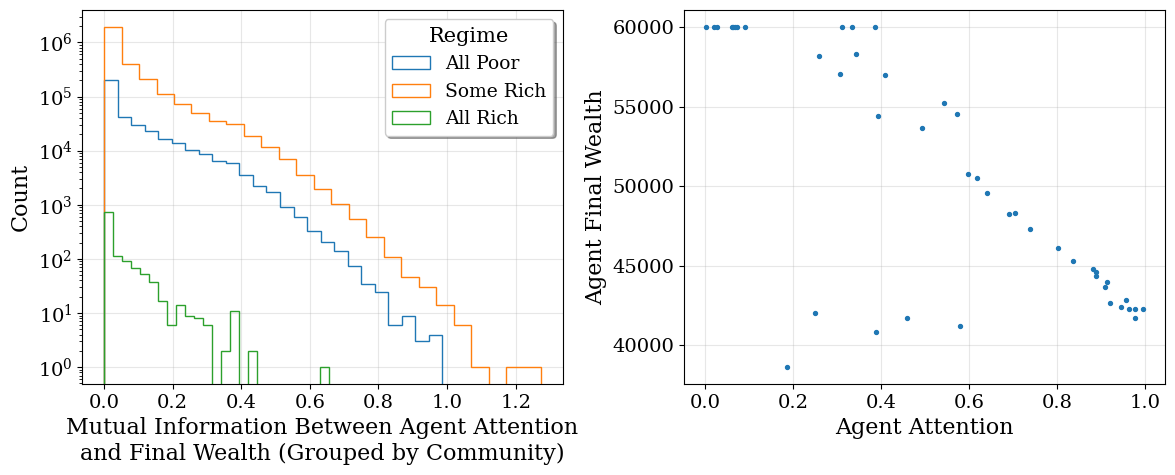

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))

label_map = {0:"All Poor", 1:"Some Rich", 2:"All Rich"}
for regime in data:
    mi = [x[0] for x in data[regime]]
    axs[0].hist(mi, histtype="step", bins=25, label=label_map[regime])

axs[0].set_yscale("log")

axs[0].legend(shadow=True, title="Regime")
axs[0].set_xlabel("Mutual Information Between Agent Attention\nand Final Wealth (Grouped by Community)")
axs[0].set_ylabel("Count")

M = max(data[1], key=lambda x:x[0])
s, param_idx = M[1], M[2]
d = pickle.load(lzma.open(f"DATA/nodebt/new_model_runs_paper_{s}/{s}_{param_idx+1}_paper.pkl.lzma"))

alpha_val = d["params"][4]
data_W = d["W"]
with open(f"sda_graphs/{s}_{alpha_val}.pickle", "rb") as f:
    communities, community_membership, _, _ = pickle.load(f)
idx = np.array(list(communities[12]))
axs[1].scatter(d["A"][idx], d["W"][-1][idx], s=8)
axs[1].set_xlabel("Agent Attention")
axs[1].set_ylabel("Agent Final Wealth")

fig.tight_layout()
plt.savefig("attention_figure.pdf", bbox_inches="tight")
plt.show()

In [4]:
M = max(data[1], key=lambda x:x[0])
s, param_idx = M[1], M[2]
print(M)

(1.273799183155732, 5, 5999, 12)


In [5]:
d = pickle.load(lzma.open(f"DATA/nodebt/new_model_runs_paper_{s}/{s}_{param_idx+1}_paper.pkl.lzma"))

alpha_val = d["params"][4]
data_W = d["W"]
with open(f"sda_graphs/{s}_{alpha_val}.pickle", "rb") as f:
    communities, community_membership, _, _ = pickle.load(f)

In [6]:
asdf = []
for i,c in enumerate(communities):
    idx = np.array(list(c))
    final_comm_w = data_W[-1, idx]
    try:
        MI = mutual_info_regression(d["A"][idx].reshape(-1,1), 
                                    final_comm_w.astype(np.float32))[0]
        print(MI, i, len(c))
    except:
        print("error")

0.04238143056935506 0 66
0.08783738091588633 1 111
0.04479212953858447 2 109
0 3 95
0.00937391844003077 4 89
0.009565894150893595 5 51
0 6 72
0 7 40
0.04871141474308782 8 75
0.5323981364943884 9 80
0.06944444444444486 10 6
0.0021940428516757926 11 34
1.273799183155732 12 44
0.06102833504569949 13 23
0.03195572905285182 14 86
0 15 20
0.21680554038072675 16 33
0.02964384889872962 17 69
0 18 17
0.010317460317460503 19 9
0.1090277777777775 20 18
0 21 16
0 22 7
0.17601561203561378 23 29
error
0 25 13
0.016825396825396632 26 10


In [7]:
idx = np.array(list(communities[12]))

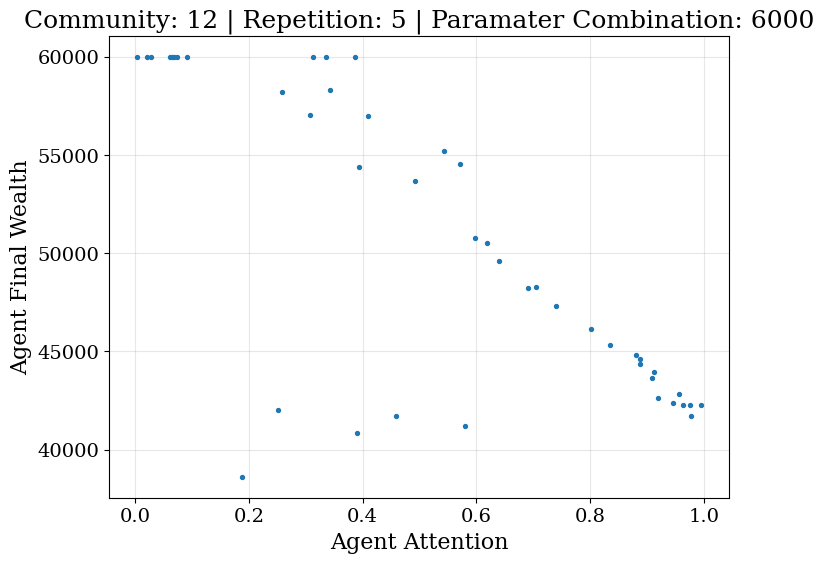

In [10]:
plt.scatter(d["A"][idx], d["W"][-1][idx], s=8)
plt.title("Community: 12 | Repetition: 5 | Paramater Combination: 6000")
plt.xlabel("Agent Attention")
plt.ylabel("Agent Final Wealth")
plt.show()

In [60]:
util_params = np.array(d["U"])[idx]
util_params = np.row_stack(
    [(x.delta_pos, x.delta_neg, x.gamma_pos, x.gamma_neg) for x in util_params]
)

X = np.column_stack([util_params, d["A"][idx].reshape(44,1)])


y = d["W"][-1][idx]

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X, y)


lin = LinearRegression().fit(X, y)

In [96]:
from scipy.stats import spearmanr

In [108]:
spearmanr(X[:,0], y)

SignificanceResult(statistic=-0.01263725982540113, pvalue=0.9351110757611382)